In [ ]:
# import airfoil as af
import numpy as np
import os,sys
import matplotlib.pyplot as plt
from xfoil import XFoil
from xfoil.model import Airfoil as XFAirfoil
from xfoil.test import naca0012

from pathlib import Path
sys.path.append(str(Path.cwd().parent))
from airLibs import airfoil as af
from airLibs import runF2w as f2w
from airLibs import plotting as aplt
from airLibs import runOpenFoam as of

from subprocess import call

# Get Airfoil

In [ ]:
for i in os.listdir():
    if i.startswith('naca'):
        airfile = i
airfoil = airfile[4:]

# Generate Airfoil

In [ ]:
n_points = 100
pts = af.saveAirfoil(['s',airfile,airfoil,0,n_points])
x,y = pts.T
plt.plot(x[:n_points-20],y[:n_points-20],'r')
plt.plot(x[n_points:-20],y[n_points:-20],'b')

# plt.plot(x,y)
plt.axis("scaled")

# Setup Case

In [ ]:
Ncrit = 9
ftrip_low = {'pos':0.1,'neg':0.2} 
ftrip_up  = {'pos':0.1,'neg':0.2} 

angles = np.linspace(-6,15,43)
Reyn = 346153 #np.logspace(3,6,20)
MACH = 0.03

# Foil2Wake

In [ ]:
# f2w.deleteResults()
# clcd = f2w.runFw2(Reyn,MACH,ftrip_low,ftrip_up,angles,airfile)
clcdcmFW = f2w.makeCLCD(Reyn,MACH,angles)

# Xfoil

In [ ]:
xf = XFoil()
xf.Re = Reyn
xf.max_iter = 40
xpts,ypts = pts.T
naca0008 = XFAirfoil(x=xpts,y=ypts)
xf.airfoil = naca0008
aXF, clXF, cdXF, cmXF,cpXF = xf.aseq(-6, 15, 0.5)
clcdcmXF = np.array([aXF, clXF, cdXF, cmXF]).T

# OpenFoam

In [13]:
# of.makeMesh(airfile)
# of.setupOpenFoam(Reyn,MACH,angles,silent = True)
# of.runFoam(a)
clcdcmOF = of.makeCLCD(angles)

# Plotting

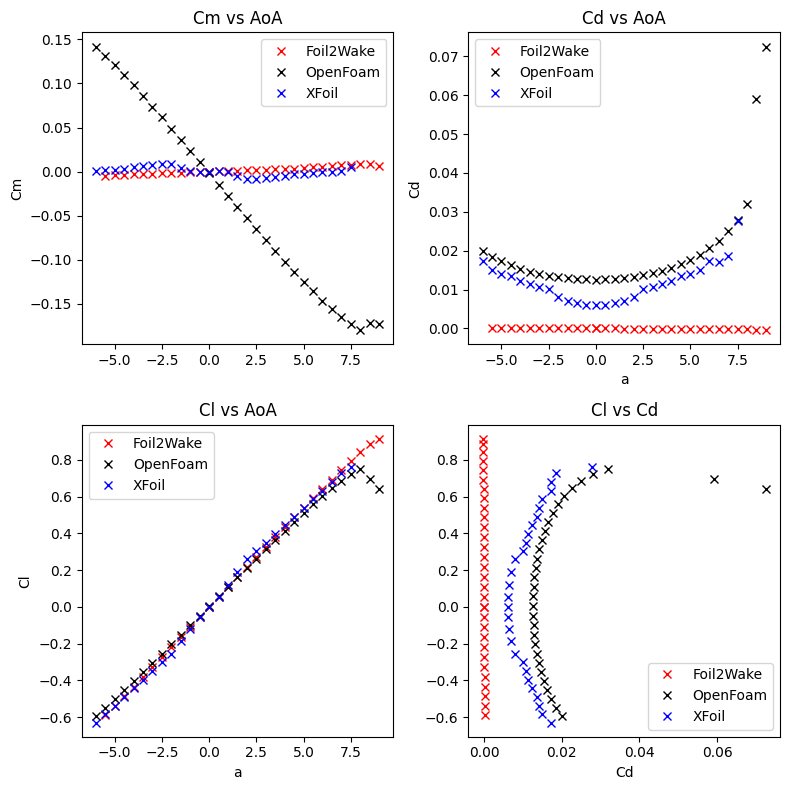

In [21]:
f2w = [clcdcmFW,'rx','Foil2Wake']
openF = [clcdcmOF,'kx','OpenFoam']
Xfoil = [clcdcmXF,'bx','XFoil']
aplt.plotAeorCoeffs([f2w,openF,Xfoil])

In [22]:
Reyn

346153